In [72]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import tabula

In [2]:
data = pd.read_csv('Health_AnimalBites.csv')

In [3]:
data.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


In [5]:
data.ResultsIDDesc.value_counts()

UNKNOWN     1240
NEGATIVE     299
POSITIVE       4
Name: ResultsIDDesc, dtype: int64

In [6]:
data[data.ResultsIDDesc == 'POSITIVE']

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
1418,2015-05-05 00:00:00,BAT,NaN,NaN,NaN,NaN,NaN,40203,NaN,NaN,NaN,NaN,2015-05-05 00:00:00,NaN,POSITIVE
1502,2017-04-29 00:00:00,DOG,GREAT PYRENEESE,FEMALE,WHITE,NaN,NaN,40210,NaN,NaN,NaN,NaN,2017-05-01 00:00:00,NaN,POSITIVE
1677,NaN,BAT,NaN,NaN,NaN,NaN,NaN,40207,NaN,NaN,NaN,NaN,2016-07-10 00:00:00,NaN,POSITIVE
1678,NaN,BAT,NaN,NaN,NaN,NaN,NaN,40214,NaN,NaN,NaN,NaN,2016-07-29 00:00:00,NaN,POSITIVE


In [7]:
data.SpeciesIDDesc.value_counts()

DOG        7029
CAT        1568
BAT         237
RACCOON      27
OTHER        11
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: SpeciesIDDesc, dtype: int64

In [8]:
data.BreedIDDesc.value_counts()

PIT BULL           1102
GERM SHEPHERD       327
LABRADOR RETRIV     253
BOXER               181
CHICHAUHUA          165
                   ... 
OLD ENG SHP DOG       1
STAN POODLE           1
IRISH SPANIEL         1
AMER FOX HOUND        1
CHOCOLATE LAB.        1
Name: BreedIDDesc, Length: 101, dtype: int64

In [9]:
data.bite_date.value_counts()

2017-08-15 00:00:00    13
2015-03-17 00:00:00    12
2010-04-01 00:00:00    12
2014-04-26 00:00:00    12
2014-05-03 00:00:00    11
                       ..
2014-10-24 00:00:00     1
2014-01-10 00:00:00     1
2011-12-05 00:00:00     1
2016-03-10 00:00:00     1
2012-11-30 00:00:00     1
Name: bite_date, Length: 2702, dtype: int64

In [10]:
incident_data = data[data.bite_date.notnull()]

In [11]:
incident_data.bite_date.replace('5013-07-15 00:00:00','2013-07-15 00:00:00', inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [12]:
incident_data.bite_date = pd.to_datetime(incident_data.bite_date)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
incident_data['season'] = incident_data.bite_date.dt.month%12 // 3 + 1

<ipython-input-13-eb8634111e2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incident_data['season'] = incident_data.bite_date.dt.month%12 // 3 + 1


In [14]:
incident_data.season = incident_data.season.astype('int')

In [113]:
bites = incident_data[(incident_data.SpeciesIDDesc.notnull()) & \
                          (incident_data.victim_zip.notnull())] 

In [138]:
louisville_bites = bites[bites.victim_zip.str[:3] == '402']

In [139]:
bite_by_season = louisville_bites[['SpeciesIDDesc', 'victim_zip', 'season', 'ResultsIDDesc']]

<AxesSubplot:xlabel='season', ylabel='Count'>

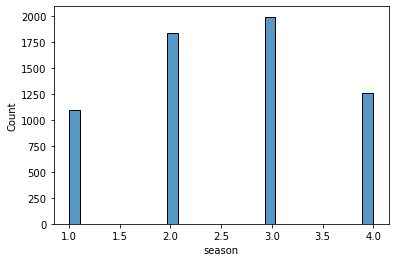

In [142]:
sns.histplot(bite_by_season.season)

<AxesSubplot:xlabel='SpeciesIDDesc', ylabel='Count'>

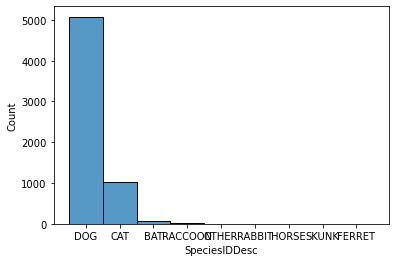

In [143]:
sns.histplot(bite_by_season.SpeciesIDDesc)

In [145]:
zips = bite_by_season.victim_zip.value_counts()

In [148]:
top_5 = zips[:6]

In [158]:
top_5 = list(top_5.index)

In [164]:
top_5 = bite_by_season[bite_by_season['victim_zip'].isin(top_5)]

<AxesSubplot:xlabel='victim_zip', ylabel='Count'>

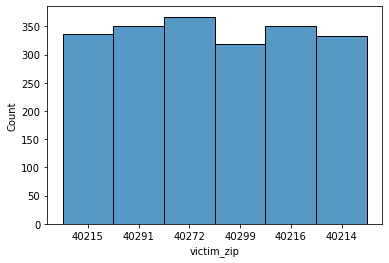

In [165]:
sns.histplot(top_5.victim_zip)

In [184]:
df = louisville_bites.groupby(['season', 'SpeciesIDDesc', 'victim_zip', 'ResultsIDDesc'], as_index=False).size()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 54.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 58.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='SpeciesIDDesc', ylabel='size'>

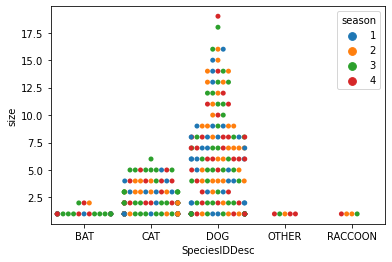

In [193]:
sns.swarmplot(df.SpeciesIDDesc, df['size'], hue=df.season)

In [186]:
bcd = df[df.SpeciesIDDesc.isin(['BAT', 'CAT', 'DOG'])]

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 35.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 45.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='SpeciesIDDesc', ylabel='size'>

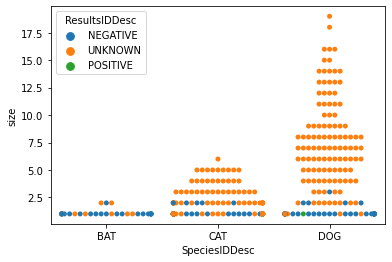

In [189]:
sns.swarmplot(bcd.SpeciesIDDesc, bcd['size'], hue=bcd.ResultsIDDesc)